In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

In [2]:
marketing_campaign_data = pd.read_excel('marketing_campaign.xlsx','Sheet1')

In [3]:
marketing_campaign_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
marketing_campaign_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
marketing_campaign_data.info()#check the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
marketing_campaign_data.isnull().sum()
#check missing value

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
marketing_campaign_data['Income'] = marketing_campaign_data['Income'].fillna(marketing_campaign_data.Income.mean(), axis = 0)
#fill the na value with the mean of income ,since we can not drop the na simply or fill it simply with 0 in this case
marketing_campaign_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
marketing_campaign_data.duplicated().sum()#check duplicated

0

In [9]:
marketing_campaign_data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
marketing_campaign_data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [11]:
marketing_campaign_data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
#convert the date column to date type column, and divide into three columns
marketing_campaign_data['Dt_Customer'] = pd.to_datetime(marketing_campaign_data['Dt_Customer'])
marketing_campaign_data['Year_Customer'] = marketing_campaign_data['Dt_Customer'].apply(lambda x: x.year)
marketing_campaign_data['Month_Customer'] = marketing_campaign_data['Dt_Customer'].apply(lambda x: x.month)
marketing_campaign_data['Day_Customer'] = marketing_campaign_data['Dt_Customer'].apply(lambda x: x.day)
marketing_campaign_data = marketing_campaign_data.drop('Dt_Customer', axis=1)

In [22]:
#encode the education column
le=LabelEncoder()
label=le.fit_transform(marketing_campaign_data['Education'])
label
marketing_campaign_data.drop('Education',axis=1)
marketing_campaign_data['Education']=label

In [23]:
#encode the marital_Status column
label1=le.fit_transform(marketing_campaign_data['Marital_Status'])
marketing_campaign_data.drop('Marital_Status',axis=1)
marketing_campaign_data['Marital_Status']=label1
marketing_campaign_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,2012,9,4
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,2014,3,8
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,2014,2,10
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,709,43,...,0,0,0,0,3,11,0,2013,6,13
2236,4001,1946,4,5,64014.0,2,1,56,406,0,...,0,1,0,0,3,11,0,2014,6,10
2237,7270,1981,2,2,56981.0,0,0,91,908,48,...,0,0,0,0,3,11,0,2014,1,25
2238,8235,1956,3,5,69245.0,0,1,8,428,30,...,0,0,0,0,3,11,0,2014,1,24


In [24]:
#filtering the features with only one class or single value and drop
for col in marketing_campaign_data.columns :
    if len(marketing_campaign_data[col].value_counts()) == 1 :
        print(marketing_campaign_data[col].value_counts())

3    2232
Name: Z_CostContact, dtype: int64
11    2232
Name: Z_Revenue, dtype: int64


### EDA

Text(0.5, 1.0, 'Education Distribution')

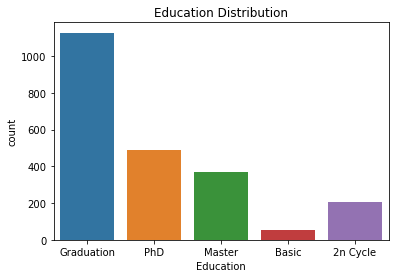

In [12]:
sns.countplot(x = 'Education',data = marketing_campaign_data)
plt.title('Education Distribution')


Text(0.5, 1.0, 'Marital Status Distribution')

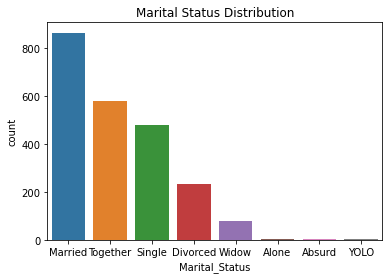

In [13]:
sns.countplot(x = 'Marital_Status',data = marketing_campaign_data, 
              order = marketing_campaign_data['Marital_Status'].value_counts().index)
plt.title('Marital Status Distribution')

<AxesSubplot:title={'center':'Maximum Number of Customers Purchases'}, xlabel='Purchases', ylabel='0'>

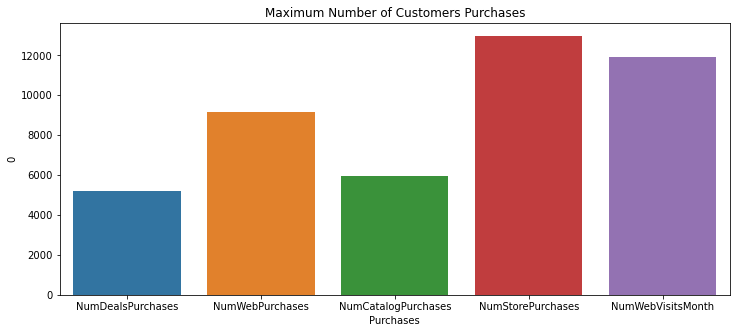

In [14]:
#which purches way is the customers' favorite
spent_tot = pd.DataFrame(marketing_campaign_data[['NumDealsPurchases', 'NumWebPurchases',
                                                  'NumCatalogPurchases', 'NumStorePurchases',
                                                  'NumWebVisitsMonth']].sum())
plt.figure(figsize=(12,5))
plt.title('Maximum Number of Customers Purchases')
plt.xlabel("Purchases")
plt.ylabel("Count")
sns.barplot(x = spent_tot.index,y = spent_tot[0], data = spent_tot)

<AxesSubplot:title={'center':'Popular Type of Groceries'}, xlabel='Types of Groceries', ylabel='0'>

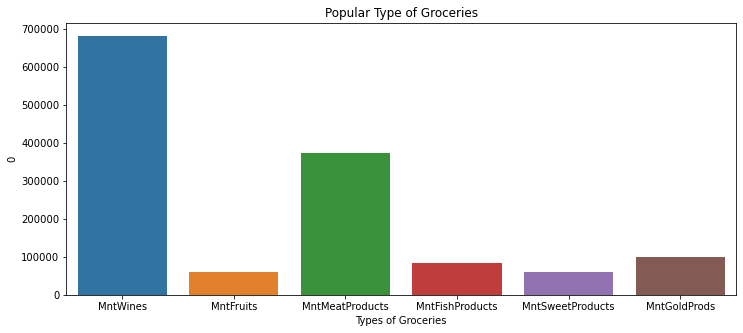

In [15]:
#What type of groceries are most popular
spent_tot = pd.DataFrame(marketing_campaign_data[[ 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum())
plt.figure(figsize=(12,5))
plt.title('Popular Type of Groceries')
plt.xlabel("Types of Groceries")
plt.ylabel("Count")
sns.barplot(x = spent_tot.index,y = spent_tot[0], data = spent_tot)

Text(0.5, 1.0, 'Income Distribution')

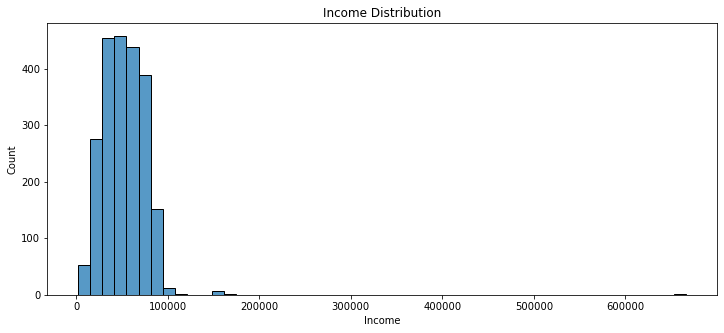

In [16]:
#Find the data distribution
plt.figure(figsize=(12,5))
sns.histplot(x='Income',bins=50,data=marketing_campaign_data,multiple='stack')
plt.title('Income Distribution')
## After remove some fewer outlier data, I find the Income is right skewed normal distribution.

In [17]:
Q1 = marketing_campaign_data['Income'].quantile(0.25)
Q3 = marketing_campaign_data['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (marketing_campaign_data['Income'] < lower_lim)
outliers_up = (marketing_campaign_data['Income'] > upper_lim)
len(marketing_campaign_data['Income'] - (len(marketing_campaign_data['Income'][outliers_low] 
                                             + len(marketing_campaign_data['Income'][outliers_up]))))
marketing_campaign_data['Income'][(outliers_low | outliers_up)]
marketing_campaign_data['Income'][~(outliers_low | outliers_up)]
marketing_campaign_data = marketing_campaign_data[~(outliers_low | outliers_up)]

<AxesSubplot:title={'center':'Income Distribution after removing Outliers'}, xlabel='Income'>

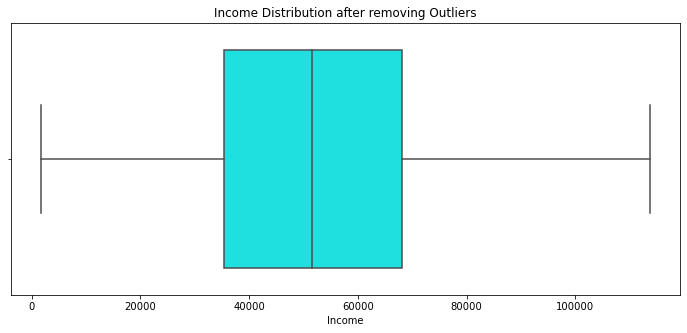

In [18]:
plt.figure(figsize=(12,5))
plt.title('Income Distribution after removing Outliers')
sns.boxplot(x='Income',data=marketing_campaign_data,color="cyan")

In [19]:
marketing_campaign_data['Response'].value_counts()

0    1898
1     334
Name: Response, dtype: int64

Response
0    85.035842
1    14.964158
dtype: float64


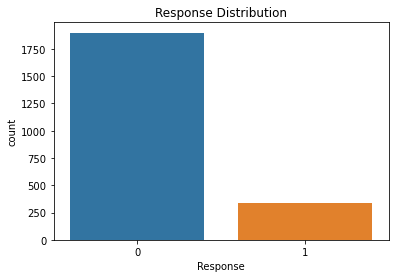

In [20]:
sns.countplot(x = 'Response',data = marketing_campaign_data)
plt.title('Response Distribution')

response_rate = (marketing_campaign_data.groupby('Response').size()/marketing_campaign_data['Response'].count())*100
print(response_rate)

## It's not a balance dataset. The majority class is 0, means most of customers will reject the marketing compaign.

### Feature Importance

ID                    -0.021832
Year_Birth             0.021822
Education              0.092006
Marital_Status        -0.011228
Income                 0.174045
Kidhome               -0.080344
Teenhome              -0.155438
Recency               -0.198945
MntWines               0.246398
MntFruits              0.124578
MntMeatProducts        0.246767
MntFishProducts        0.110527
MntSweetProducts       0.116552
MntGoldProds           0.138885
NumDealsPurchases      0.003816
NumWebPurchases        0.147314
NumCatalogPurchases    0.235217
NumStorePurchases      0.037215
NumWebVisitsMonth     -0.006624
AcceptedCmp3           0.253953
AcceptedCmp4           0.176674
AcceptedCmp5           0.326362
AcceptedCmp1           0.293717
AcceptedCmp2           0.169175
Complain              -0.001854
Z_CostContact               NaN
Z_Revenue                   NaN
Response               1.000000
Year_Customer         -0.171112
Month_Customer         0.032242
Day_Customer          -0.009753
Name: Re

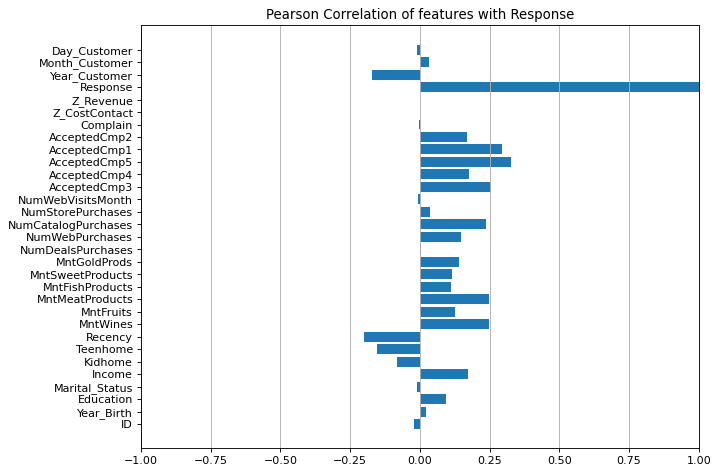

<Figure size 432x288 with 0 Axes>

In [25]:
print(marketing_campaign_data.corr()['Response'])
from matplotlib.pyplot import figure
figure(figsize=(9, 7), dpi=80)
plt.barh(np.arange(len(marketing_campaign_data.corr()['Response'])), 
         marketing_campaign_data.corr()['Response'],align = 'center',tick_label = marketing_campaign_data.columns)
plt.xlim((-1,1))
plt.grid(axis='x')
plt.title('Pearson Correlation of features with Response')
plt.show()

plt.clf()

In [26]:
y=marketing_campaign_data['Response']#specify the dependent variable and independent variable
x=marketing_campaign_data.drop(['ID','Response','Z_CostContact','Z_Revenue'],axis=1)
x

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
0,1957,2,4,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,2012,9,4
1,1954,2,4,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,2014,3,8
2,1965,2,5,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,2013,8,21
3,1984,2,5,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,2014,2,10
4,1981,4,3,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,2013,6,13
2236,1946,4,5,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,2014,6,10
2237,1981,2,2,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,2014,1,25
2238,1956,3,5,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,2014,1,24


<AxesSubplot:>

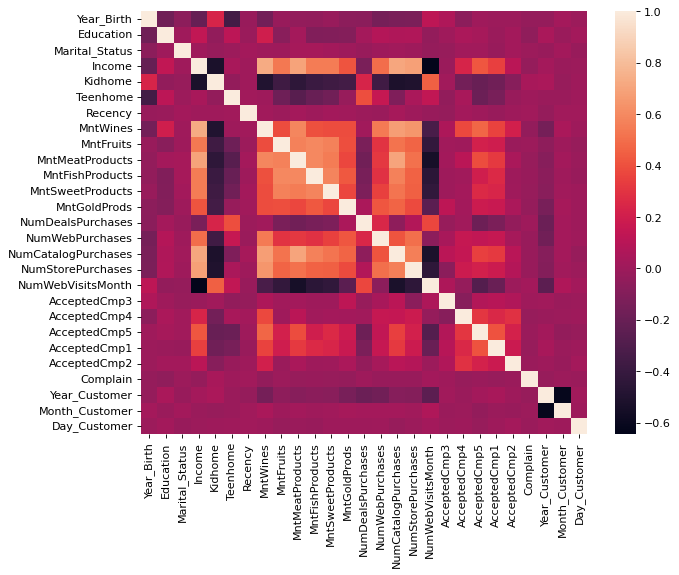

In [27]:
from matplotlib.pyplot import figure
figure(figsize=(9, 7), dpi=80)
corr_matrix=x.corr()#check correlation
sns.heatmap(corr_matrix)


In [28]:
corr_matrix

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
Year_Birth,1.000000,-0.171953,-0.061613,-0.209560,0.230499,-0.352850,-0.018201,-0.157340,-0.017528,-0.038253,...,0.123488,0.062172,-0.060281,0.007443,-0.005648,-0.006419,-0.030059,-0.028066,0.025162,-0.006458
Education,-0.171953,1.000000,0.007499,0.137993,-0.045144,0.118721,-0.012692,0.199991,-0.079342,0.028316,...,-0.035386,0.006503,0.054042,0.034071,-0.010255,0.021684,-0.050414,0.045834,-0.011473,0.020425
Marital_Status,-0.061613,0.007499,1.000000,0.010174,-0.025183,-0.003572,0.017297,0.008531,0.000866,0.032244,...,-0.032384,-0.027039,0.014551,0.012982,-0.017009,0.018513,-0.005683,-0.017169,0.017389,-0.015855
Income,-0.209560,0.137993,0.010174,1.000000,-0.527623,0.042043,0.005723,0.728020,0.535837,0.693954,...,-0.644793,-0.011415,0.230961,0.416010,0.342497,0.110020,-0.030273,0.025347,-0.011012,-0.008429
Kidhome,0.230499,-0.045144,-0.025183,-0.527623,1.000000,-0.036841,0.010428,-0.498156,-0.373654,-0.443308,...,0.449030,0.014569,-0.161994,-0.206096,-0.172735,-0.081893,0.040222,0.054014,-0.024217,-0.000074
Teenhome,-0.352850,0.118721,-0.003572,0.042043,-0.036841,1.000000,0.015326,0.003338,-0.177940,-0.267387,...,0.133457,-0.043222,0.038472,-0.191842,-0.140764,-0.015826,0.002978,-0.008946,-0.014275,0.006092
Recency,-0.018201,-0.012692,0.017297,0.005723,0.010428,0.015326,1.000000,0.016190,-0.004093,0.025976,...,-0.020333,-0.033082,0.018851,0.000112,-0.019342,-0.001792,0.013254,-0.028640,0.014900,0.010836
MntWines,-0.157340,0.199991,0.008531,0.728020,-0.498156,0.003338,0.016190,1.000000,0.388714,0.586803,...,-0.328249,0.061458,0.372961,0.472434,0.353838,0.205821,-0.039344,-0.154059,0.045236,-0.002160
MntFruits,-0.017528,-0.079342,0.000866,0.535837,-0.373654,-0.177940,-0.004093,0.388714,1.000000,0.563786,...,-0.424982,0.014187,0.009601,0.215438,0.194370,-0.010008,-0.005361,-0.054694,0.002979,-0.022102
MntMeatProducts,-0.038253,0.028316,0.032244,0.693954,-0.443308,-0.267387,0.025976,0.586803,0.563786,1.000000,...,-0.543495,0.020920,0.108193,0.387355,0.321237,0.045220,-0.023478,-0.084201,0.022383,-0.010223


### SVM Model

In [29]:
#divide the train ,test group
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state = 0)

x_train

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
1739,1971,4,3,42403.0,1,0,18,22,1,11,...,8,0,0,0,0,0,0,2013,12,11
439,1986,0,3,7500.0,1,0,96,1,11,5,...,8,0,0,0,0,0,0,2013,2,7
300,1958,2,2,35246.0,1,1,53,36,0,12,...,5,0,0,0,0,0,0,2014,4,16
1501,1973,0,2,31163.0,1,0,54,2,3,10,...,6,0,0,0,0,0,0,2014,2,13
1515,1980,2,4,51766.0,1,0,74,60,51,87,...,5,0,0,0,0,0,0,2014,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1972,3,4,46423.0,1,1,6,68,0,16,...,7,0,0,0,0,0,0,2013,9,18
1737,1963,2,3,77437.0,0,0,70,560,21,442,...,1,0,0,1,0,0,0,2013,11,26
767,1987,2,5,67430.0,0,0,6,595,97,291,...,6,0,0,0,0,0,0,2012,9,5
839,1977,2,4,56628.0,0,1,30,479,5,82,...,5,1,0,0,0,0,0,2014,3,21


0.8448179271708683
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       395
           1       0.50      0.04      0.07        52

    accuracy                           0.88       447
   macro avg       0.69      0.52      0.50       447
weighted avg       0.84      0.88      0.84       447

[[393   2]
 [ 50   2]]


<AxesSubplot:>

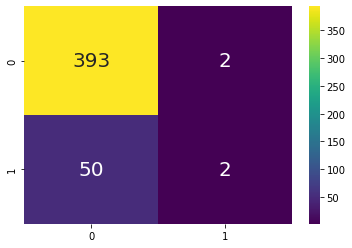

In [30]:
#SVM model

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm

svc_model=svm.SVC(kernel='linear')
svc_final=svc_model.fit(x_train,y_train)
print(svc_final.score(x_train,y_train))

y_pred1=svc_model.predict(x_test)
print(classification_report(y_test,y_pred1))#classification report for svm model prediction

cm1=confusion_matrix(y_test, y_pred1)#confusion matrix for the svm model prediction
print(cm1)

## Heat Map to depict the Confusion Matrix
sns.heatmap(cm1,cmap="viridis",annot=True,fmt=".0f",annot_kws= {"size":20})



0.9927170868347339
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       395
           1       0.64      0.13      0.22        52

    accuracy                           0.89       447
   macro avg       0.77      0.56      0.58       447
weighted avg       0.87      0.89      0.86       447

[[391   4]
 [ 45   7]]


<AxesSubplot:>

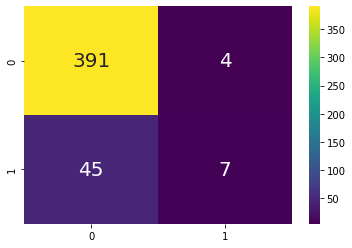

In [31]:
#SVM model

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

svc_model=svm.SVC(kernel='rbf',gamma='auto',C=1)
svc_final=svc_model.fit(x_train,y_train)
print(svc_final.score(x_train,y_train))

y_pred1=svc_model.predict(x_test)
print(classification_report(y_test,y_pred1))#classification report for svm model prediction

cm1=confusion_matrix(y_test, y_pred1)#confusion matrix for the svm model prediction
print(cm1)

## Heat Map to depict the Confusion Matrix
sns.heatmap(cm1,cmap="viridis",annot=True,fmt=".0f",annot_kws= {"size":20})




In [ ]:
#pip install imblearn


In [ ]:
#pip install scikit-learn

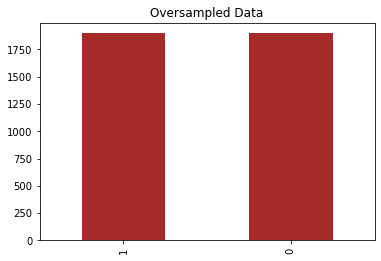

In [38]:
from imblearn.over_sampling import SMOTE
labels = marketing_campaign_data.columns
smote = SMOTE(n_jobs=-1)
X_sm, y_sm = smote.fit_resample(marketing_campaign_data[labels], marketing_campaign_data['Response'])

df_over = pd.DataFrame(X_sm, columns=labels)
df_over['Response'] = y_sm

df_over['Response'].value_counts().plot(kind='bar', title='Oversampled Data', color='brown');



              precision    recall  f1-score   support

           0       0.84      0.75      0.79       391
           1       0.76      0.85      0.80       369

    accuracy                           0.80       760
   macro avg       0.80      0.80      0.80       760
weighted avg       0.80      0.80      0.80       760

[[293  98]
 [ 57 312]]


<AxesSubplot:>

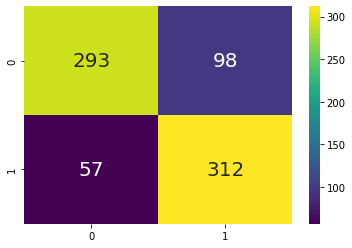

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X_sm, y_sm,test_size=0.2,random_state = 0)
classifier=svm.SVC(kernel='linear',gamma= 'auto',C=1)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)

#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

#Accuracy of our model.
from sklearn.metrics import confusion_matrix
cmm=confusion_matrix(y_test,y_predict)
print(cmm)
Accuracy=sum(np.diag(c))/(np.sum(c))
Accuracy

## Heat Map to depict the Confusion Matrix
sns.heatmap(cmm,cmap="viridis",annot=True,fmt=".0f",annot_kws= {"size":20})




In [ ]:
## Heat Map to depict the Confusion Matrix
sns.heatmap(cm1,cmap="viridis",annot=True,fmt=".0f",annot_kws= {"size":20})


